In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/london-bike-sharing-dataset/london_merged.csv


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [16]:
# 데이터 불러오기
df = pd.read_csv('/kaggle/input/london-bike-sharing-dataset/london_merged.csv', parse_dates = ['timestamp'])
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [17]:
# 데이터 크기
print("데이터의 크기:", df.shape)
print()
# 데이터 타입
print("데이터 타입:", df.dtypes)
print()
# 데이터 칼럼들
print("데이터 컬럼:", df.columns)

데이터의 크기: (17414, 10)

데이터 타입: timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

데이터 컬럼: Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')


In [18]:
# 결측치가 있을까?
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [19]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['hour'] = df['timestamp'].dt.hour
df.head(10)


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,dayofweek,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0,2015,1,6,5
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0,2015,1,6,6
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0,2015,1,6,7
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0,2015,1,6,8
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0,2015,1,6,9


In [20]:
# 컬럼별로 분석을 진행
df['year'].value_counts()

2016    8699
2015    8643
2017      72
Name: year, dtype: int64

In [21]:
df['month'].value_counts()

5     1488
1     1487
8     1484
12    1484
7     1481
10    1479
3     1468
4     1438
11    1430
6     1422
9     1394
2     1359
Name: month, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='year', ylabel='cnt'>

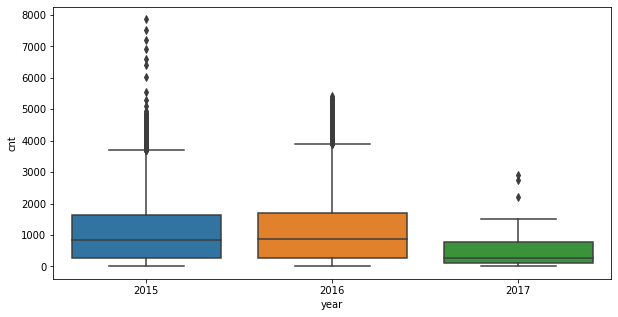

In [23]:
# 데이터 시각화 해보기
a, b = plt.subplots(1, 1, figsize=(10, 5))
sns.boxplot(df['year'], df['cnt'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='month', ylabel='cnt'>

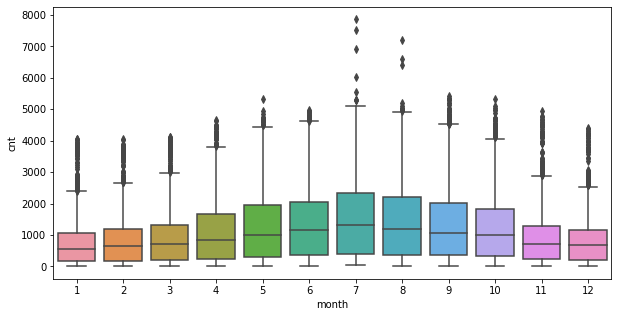

In [25]:
a, b = plt.subplots(1, 1, figsize=(10, 5))
sns.boxplot(df['month'], df['cnt'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='dayofweek', ylabel='cnt'>

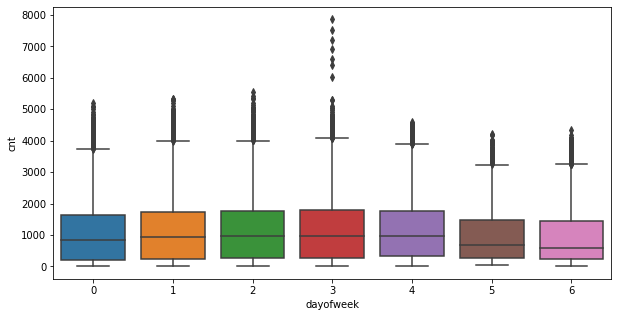

In [26]:
a, b = plt.subplots(1, 1, figsize=(10, 5))
sns.boxplot(df['dayofweek'], df['cnt'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='hour', ylabel='cnt'>

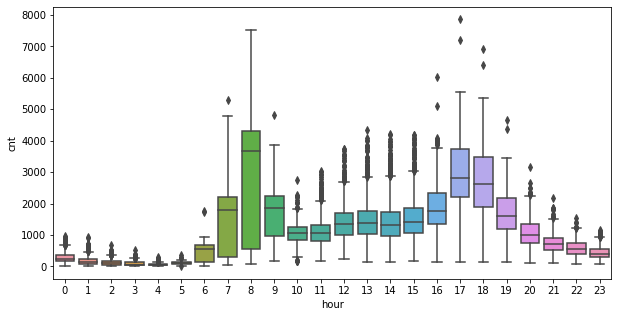

In [27]:
a, b = plt.subplots(1, 1, figsize=(10, 5))
sns.boxplot(df['hour'], df['cnt'])

In [33]:
# 그래프 그려주는 함수 만들어보기
def plot_bar(data, feature):
    fig = plt.figure(figsize=(12, 3))
    sns.barplot(x=feature, y='cnt', data=data, palette='Set3', orient='v')

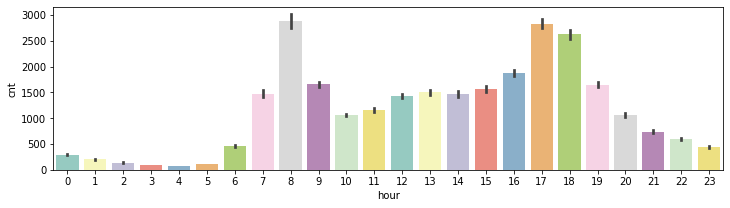

In [34]:
plot_bar(df, 'hour')

In [35]:
## 데이터 전처리 하기 outlier 제거 등
def is_outliers(s):
    lower_limit = s.mean() - (s.std() * 3)
    upper_limit = s.mean() + (s.std() * 3)
    return ~s.between(lower_limit, upper_limit)

In [37]:
df_out = df[~df.groupby('hour')['cnt'].apply(is_outliers)]
print("이상치 제거 전:", df.shape)
print("이상치 제거 후:", df_out.shape)

이상치 제거 전: (17414, 14)
이상치 제거 후: (17265, 14)


In [39]:
df_out['weather_code'] = df_out['weather_code'].astype('category')
df_out['season'] = df_out['season'].astype('category')
df_out['year'] = df_out['year'].astype('category')
df_out['month'] = df_out['month'].astype('category')
df_out['hour'] = df_out['hour'].astype('category')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [40]:
df_out.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code          category
is_holiday             float64
is_weekend             float64
season                category
year                  category
month                 category
dayofweek                int64
hour                  category
dtype: object

In [42]:
# 딥러닝은 category형 변수를 dummy 처리를 해줘야함
df_out = pd.get_dummies(df_out, columns=['weather_code', 'season', 'year', 'month', 'hour'])
df_out.head()

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,dayofweek,weather_code_1.0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,1.0,6,0,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df_out.shape

(17265, 59)

In [45]:
# 독립변수와 종속변수를 분리하자
df_y = df_out['cnt']
df_x = df_out.drop(['timestamp', 'cnt'], axis=1)
df_x.head()

,t1,t2,hum,wind_speed,is_holiday,is_weekend,dayofweek,weather_code_1.0,weather_code_2.0,weather_code_3.0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,3.0,2.0,93.0,6.0,0.0,1.0,6,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.5,93.0,5.0,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.5,2.5,96.5,0.0,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,100.0,0.0,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,0.0,93.0,6.5,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# x를 train용 test용으로 분리하자
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, random_state=66, test_size=0.3, shuffle=False)

In [49]:
print('x_train의 구조는', x_train.shape)
print('y_train의 구조는', y_train.shape)
print('x_test의 구조는', x_test.shape)
print('y_test의 구조는', y_test.shape)

x_train의 구조는 (12085, 57)
y_train의 구조는 (12085,)
x_test의 구조는 (5180, 57)
y_test의 구조는 (5180,)


In [50]:
## 딥러닝 해보기
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [51]:
model = Sequential()
model.add(Dense(units=160, activation='relu', input_dim=57))
model.add(Dense(units=60, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=1, activation='linear'))


In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 160)               9280      
_________________________________________________________________
dense_1 (Dense)              (None, 60)                9660      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1220      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 20,181
Trainable params: 20,181
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
early_stopping = EarlyStopping(monitor='loss', patience = 5, mode='min')
history = model.fit(x_train, y_train, epochs=50, batch_size=1, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/50
10876/10876 [==============================] - 14s 1ms/step - loss: 105.7479 - mae: 105.7479 - val_loss: 178.5744 - val_mae: 178.5744
Epoch 2/50
10876/10876 [==============================] - 13s 1ms/step - loss: 105.0585 - mae: 105.0585 - val_loss: 147.9982 - val_mae: 147.9982
Epoch 3/50
10876/10876 [==============================] - 13s 1ms/step - loss: 109.1077 - mae: 109.1077 - val_loss: 159.3721 - val_mae: 159.3721
Epoch 4/50
10876/10876 [==============================] - 13s 1ms/step - loss: 109.2255 - mae: 109.2255 - val_loss: 127.9031 - val_mae: 127.9031
Epoch 5/50
10876/10876 [==============================] - 13s 1ms/step - loss: 104.4643 - mae: 104.4643 - val_loss: 133.3253 - val_mae: 133.3253
Epoch 6/50
10876/10876 [==============================] - 13s 1ms/step - loss: 104.0121 - mae: 104.0121 - val_loss: 147.0485 - val_mae: 147.0485
Epoch 7/50
10876/10876 [==============================] - 13s 1ms/step - loss: 106.7121 - mae: 106.7121 - val_loss: 135.1310 - val

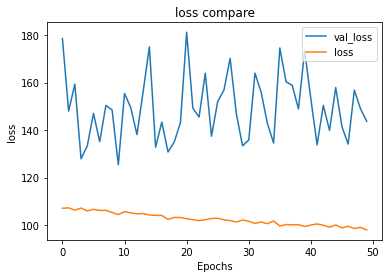

In [59]:
# 위 결과를 시각적으로 확인해보기
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('loss compare')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['val_loss', 'loss'])
plt.show()

In [61]:
y_predict = model.predict(x_test)

In [62]:
from sklearn.metrics import mean_squared_error

def RMSE(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

In [64]:
# 랜덤 포레스트로 돌려보기
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=16)
rf.fit(x_train, y_train)
rf_result = rf.predict(x_test)
print("RMSE", RMSE(y_test, rf_result))

RMSE 303.6417775662534


In [65]:
# xgboost 돌려보기
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimaotrs=100, random_state=16)
xgb.fit(x_train, y_train)
xgb_result = xgb.predict(x_test)
print("RMSE", RMSE(y_test, xgb_result))

[06:18:09] WARNING: ../src/learner.cc:573: 
Parameters: { "n_estimaotrs" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


RMSE 307.09072320247844


In [68]:
# lightgb 돌려보기
from lightgbm import LGBMRegressor
lgb = LGBMRegressor(n_estimaotrs=100, random_state=16)
lgb.fit(x_train, y_train)
lgb_result = xgb.predict(x_test)
print("RMSE", RMSE(y_test, lgb_result))

[LightGBM] [Warning] Unknown parameter: n_estimaotrs
RMSE 307.09072320247844


In [69]:
## model들 서로 비교해보기
dnn = pd.DataFrame(y_predict)
rf = pd.DataFrame(rf_result)
xgb = pd.DataFrame(xgb_result)
lgb = pd.DataFrame(lgb_result)
compare = pd.DataFrame(y_test).reset_index(drop=True)

In [71]:
compare['dnn'] = dnn
compare['rf'] = rf
compare['xgb'] = xgb
compare['lgb'] = lgb
compare.head()

,cnt,dnn,rf,xgb,lgb
0,1885,2188.308594,1700.24,1803.070923,1803.070923
1,2175,2492.516357,1803.82,2228.828125,2228.828125
2,2485,2664.490967,2191.37,2598.814697,2598.814697
3,2882,2498.850830,2206.67,2683.149658,2683.149658
4,2965,2492.229980,2276.35,2590.693848,2590.693848


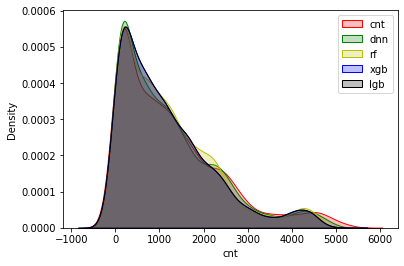

In [73]:
sns.kdeplot(compare['cnt'], shade=True, color='r')
sns.kdeplot(compare['dnn'], shade=True, color='g')
sns.kdeplot(compare['rf'], shade=True, color='y')
sns.kdeplot(compare['xgb'], shade=True, color='b')
sns.kdeplot(compare['lgb'], shade=True, color='k')
plt.legend(['cnt', 'dnn', 'rf', 'xgb', 'lgb'])